In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:/Users/Tilak Laddha/OneDrive/Desktop/New folder (4)/PROJECT TO DO/Data Analysis  Capstone Project  Power BI + SQL + Python + Excel  End to End  Edition 2025/BlinkIT Grocery Data.csv")

df.head(10)

df.tail(10)

df.shape

(8523, 12)

In [7]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [10]:
total_sales = df['Sales'].sum()

avg_sales = df['Sales'].mean()

total_orders = df['Sales'].count()

avg_rating = df['Rating'].mean()

# display

print("total sales : " , total_sales)
print("avg_sales : " , avg_sales)
print("total orders : " , total_orders)
print("avg_rating : " , avg_rating)

total sales :  1201681.4928
avg_sales :  140.99278338613163
total orders :  8523
avg_rating :  3.965857092573038


C:\Users\Tilak Laddha\AppData\Local\Temp\ipykernel_26332\1711183204.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Fat Content', y='Sales', data=sales_by_fat, palette='viridis')


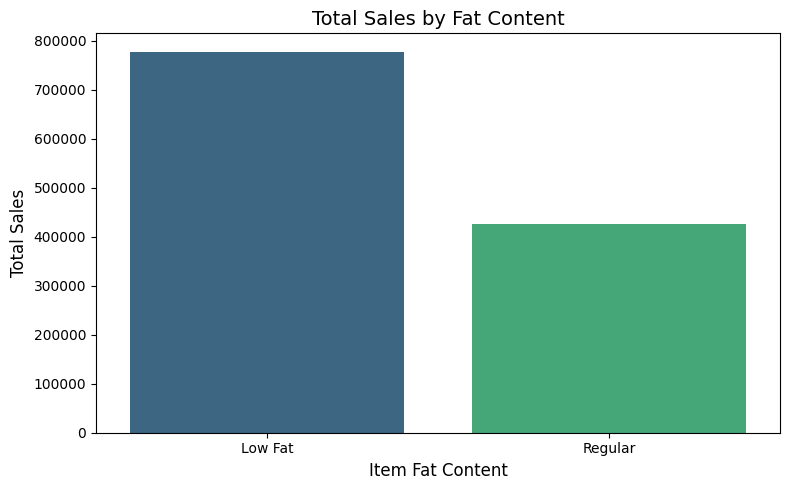

In [13]:
sales_by_fat = df.groupby(df['Item Fat Content'])['Sales'].sum().reset_index()
sales_by_fat = sales_by_fat.sort_values(by = 'Sales' , ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Item Fat Content', y='Sales', data=sales_by_fat, palette='viridis')

plt.title('Total Sales by Fat Content', fontsize=14)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\Tilak Laddha\AppData\Local\Temp\ipykernel_26332\3498385351.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Item Type', x='Sales', data=sales_by_type, palette='mako')


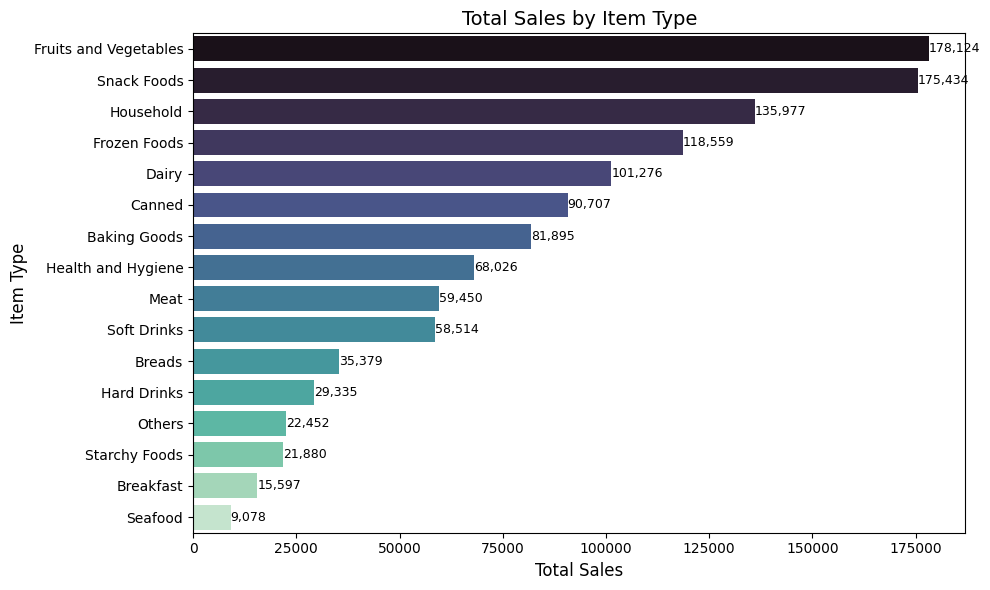

In [14]:
sales_by_type = df.groupby(df['Item Type'])['Sales'].sum().reset_index()
sales_by_type = sales_by_type.sort_values( by= 'Sales' , ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y='Item Type', x='Sales', data=sales_by_type, palette='mako')

plt.title('Total Sales by Item Type', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Item Type', fontsize=12)

for index, value in enumerate(sales_by_type['Sales']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

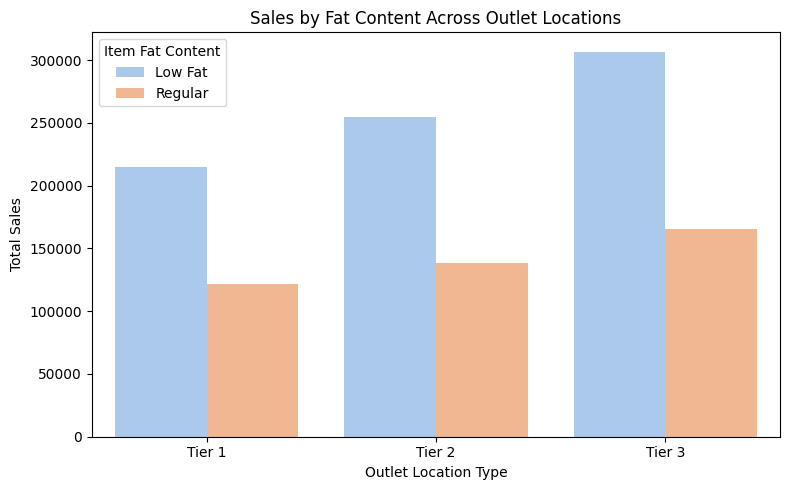

In [18]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().reset_index()
filtered_grouped = grouped[grouped['Item Fat Content'].isin(['Low Fat', 'Regular'])]

plt.figure(figsize=(8, 5))
sns.barplot(x='Outlet Location Type', y='Sales', hue='Item Fat Content', data=filtered_grouped, palette='pastel')

plt.title('Sales by Fat Content Across Outlet Locations')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

C:\Users\Tilak Laddha\AppData\Local\Temp\ipykernel_26332\1563103918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Establishment Year', y='Sales', data=sales_by_year, palette='crest')


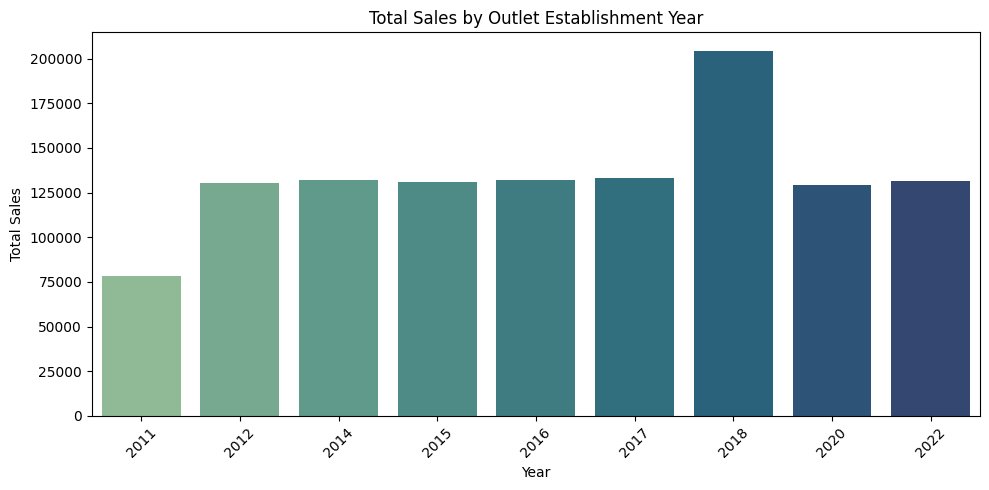

In [19]:
sales_by_year = df.groupby(df['Outlet Establishment Year'])['Sales'].sum().reset_index()
sales_by_year = sales_by_year.sort_values( by = 'Outlet Establishment Year' , ascending= False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet Establishment Year', y='Sales', data=sales_by_year, palette='crest')

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Tilak Laddha\AppData\Local\Temp\ipykernel_26332\3147929490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Size', y='Sales', data=sales_by_size, palette='flare')


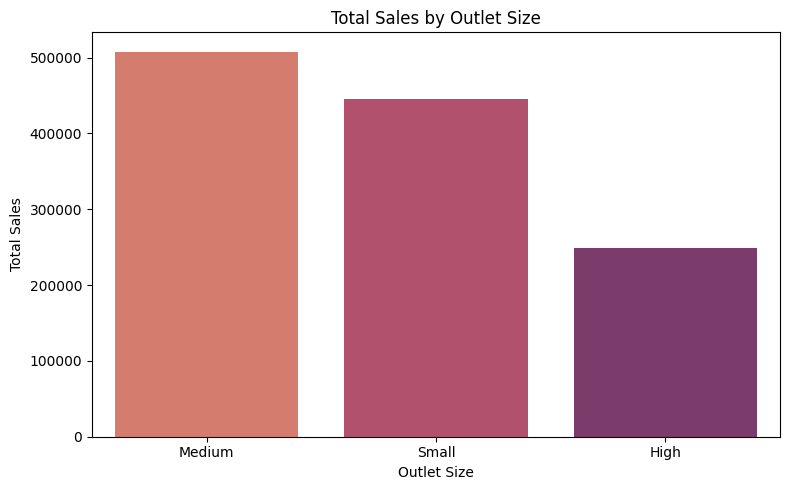

In [20]:
sales_by_size = df.groupby(df['Outlet Size'])['Sales'].sum().reset_index()
sales_by_size = sales_by_size.sort_values( by = 'Sales' , ascending= False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Outlet Size', y='Sales', data=sales_by_size, palette='flare')

plt.title('Total Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

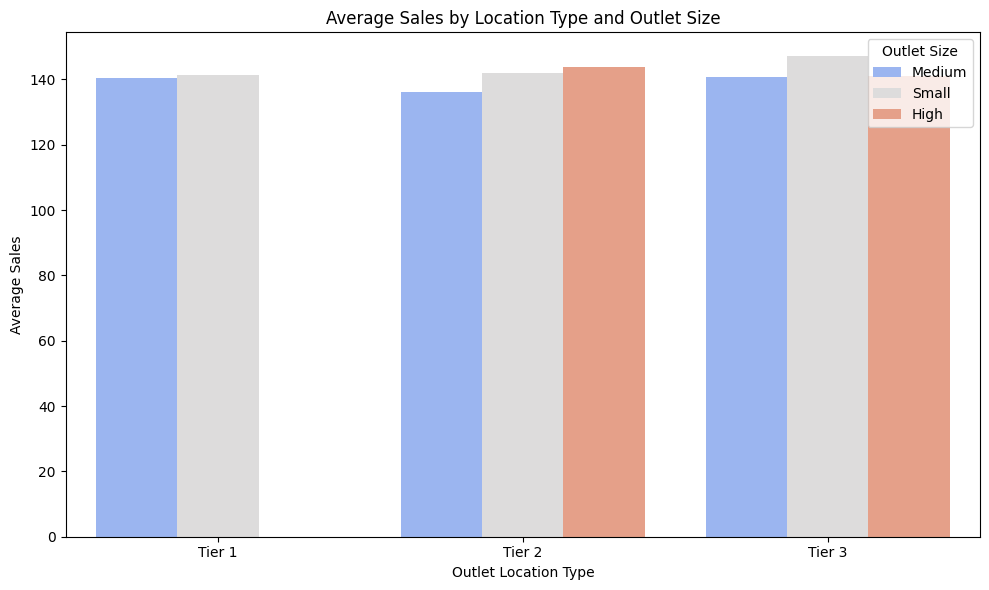

In [23]:
avg_sales_rating_by_location = df.groupby(['Outlet Location Type','Outlet Size'])['Sales'].mean().reset_index()

avg_sales_rating_by_location = avg_sales_rating_by_location[avg_sales_rating_by_location['Outlet Location Type'].isin(['Tier 1' , 'Tier 2' , 'Tier 3'])]

avg_sales_rating_by_location

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Outlet Location Type', 
    y='Sales', 
    hue='Outlet Size', 
    data=avg_sales_rating_by_location,
    palette='coolwarm'
)

plt.title('Average Sales by Location Type and Outlet Size')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()